In [ ]:
# Instalar a biblioteca do cliente do Google e a biblioteca para autenticação
#!pip install --upgrade google-api-python-client google-auth google-auth-httplib2 google-auth-oauthlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
from google.colab import auth
from google.oauth2 import service_account
from googleapiclient.discovery import build

import pandas as pd
import numpy as np

from google.colab import drive

# Passo 1: Montar o Google Drive (necessário em cada novo notebook)
# Uma janela de autenticação aparecerá para você permitir o acesso.
drive.mount('/content/drive')

# Passo 2: Definir o caminho completo do arquivo que você quer carregar
# ATENÇÃO: Use o mesmo caminho que você usou para salvar o arquivo.
caminho_do_arquivo = '/content/drive/MyDrive/MBA/TCC/Materiais_e_Metodos/Dados/dados_com_sentimento.csv'

# Passo 3: Carregar o arquivo CSV em um DataFrame do Pandas
# Usamos um bloco try...except para dar uma mensagem de erro clara se o arquivo não for encontrado.
try:
    df = pd.read_csv(caminho_do_arquivo)
    print("Arquivo carregado com sucesso!")

    # Opcional: Mostra as 5 primeiras linhas para confirmar que os dados estão corretos
    print("Amostra dos dados carregados:")
    pd.set_option('display.max_columns', None)
    print(df.head())

except FileNotFoundError:
    print(f"Erro: Arquivo não encontrado no caminho especificado.")
    print(f"Verifique se o caminho '{caminho_do_arquivo}' está correto.")

Mounted at /content/drive
Arquivo carregado com sucesso!
Amostra dos dados carregados:
             timestamp  idade_ate_25      idade_26_35 idade_36_45  \
0  29/05/2025 14:25:27           NaN              NaN         NaN   
1  30/05/2025 21:43:56           NaN    Pós-graduação         NaN   
2  31/05/2025 12:03:02           NaN  Ensino Superior         NaN   
3  31/05/2025 17:40:18           NaN  Ensino Superior         NaN   
4  02/06/2025 10:09:19  Ensino Médio              NaN         NaN   

  idade_46_ou_mais        preta        parda  indigena amarela branca  \
0    Pós-graduação          NaN  Mulher(cis)       NaN     NaN    NaN   
1              NaN  Mulher(cis)          NaN       NaN     NaN    NaN   
2              NaN  Mulher(cis)          NaN       NaN     NaN    NaN   
3              NaN          NaN  Mulher(cis)       NaN     NaN    NaN   
4              NaN  Mulher(cis)          NaN       NaN     NaN    NaN   

   nao_respondeu_raca tempo_experiencia dev_eng_software de

In [4]:
# Mostrar o número de respostas e de perguntas
print(f"Total de respostas (participantes): {df.shape[0]}")
print(f"Total de variáveis (colunas): {df.shape[1]}")
print("\n")

Total de respostas (participantes): 41
Total de variáveis (colunas): 49




In [ ]:
# 1. Instalação da biblioteca
!pip install transformers

# 2. Importação das bibliotecas necessárias
from transformers import pipeline, set_seed

set_seed(42)
# 3. Carregar o modelo de análise de sentimento para português
# O modelo "lxyuan/distilbert-base-multilingual-cased-sentiments-student" é uma boa opção
# por ser leve e suportar múltiplos idiomas, incluindo o nosso.
sentiment_pipeline = pipeline("sentiment-analysis", model="lxyuan/distilbert-base-multilingual-cased-sentiments-student")

print("✅ Modelo de análise de sentimento carregado com sucesso.")

Device set to use cpu


✅ Modelo de análise de sentimento carregado com sucesso.


# **Análise Temática**

Análise de Frequência de Palavras-Chave / Extração de Termos Relevantes.

In [ ]:
# Passo 0: Instalar a biblioteca NLTK (necessário no ambiente do notebook)
!pip install nltk

# --- PREPARAÇÃO INICIAL (só precisa rodar uma vez) ---
# Certifique-se de que os pacotes necessários do NLTK estão baixados
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Baixa a lista de stopwords em português
try:
    stopwords.words('portuguese')
except LookupError:
    print("Baixando a lista de stopwords...")
    nltk.download('stopwords')
    print("Download concluído.")

In [ ]:
#Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import os
from nltk.corpus import stopwords
from collections import Counter

In [ ]:
# --- INÍCIO DO CÓDIGO ---

def analisar_temas_por_frequencia(dataframe, coluna_texto):
    """
    Realiza uma análise de frequência de palavras em uma coluna de texto
    para identificar temas recorrentes.
    """
    print(f"\n--- Análise Temática da Coluna: '{coluna_texto}' ---")

    # 1. Limpeza e preparação dos dados
    # Remove linhas vazias e garante que tudo seja string
    textos = dataframe[coluna_texto].dropna().astype(str)

    # Concatena todas as respostas em um único texto
    texto_completo = ' '.join(textos).lower()

    # Remove pontuação e números, deixando apenas letras e espaços
    texto_completo = re.sub(r'[^a-zA-Z\s]', '', texto_completo)

    # 2. Tokenização e Remoção de Stopwords
    # Divide o texto em uma lista de palavras (tokens)
    palavras = texto_completo.split()

    # Carrega a lista de stopwords em português
    stop_words_pt = set(stopwords.words('português'))

    # Adicione palavras customizadas se notar que elas aparecem muito mas não ajudam
    # Ex: stop_words_pt.update(['acho', 'ser', 'ter'])

    # Filtra as palavras, removendo as stopwords
    palavras_filtradas = [palavra for palavra in palavras if palavra not in stop_words_pt]

    # 3. Contagem de Frequência
    # Conta a ocorrência de cada palavra
    contagem_palavras = Counter(palavras_filtradas)

    # 4. Exibição dos Resultados
    print("\nAs 15 palavras mais comuns (potenciais temas):\n")
    # O método most_common() já retorna a lista ordenada
    top_15_palavras = contagem_palavras.most_common(15)

    for palavra, contagem in top_15_palavras:
        print(f"- {palavra}: {contagem} vezes")

    return contagem_palavras


# --- Como usar a função ---

# Lembre-se de carregar seu DataFrame 'df' primeiro, usando o código do Drive
# df = pd.read_csv('/content/drive/MyDrive/TCC/Dados/dados_com_sentimento.csv')

# Analise a coluna de opinião sobre vagas afirmativas
contagem_opiniao = analisar_temas_por_frequencia(df, 'opiniao_vagas_afirmativas')

# Você pode chamar a função para outras colunas de texto que tiver
# Ex: contagem_barreiras = analisar_temas_por_frequencia(df, 'enfrentou_barreiras')


--- Análise Temática da Coluna: 'opiniao_vagas_afirmativas' ---


OSError: No such file or directory: '/root/nltk_data/corpora/stopwords/português'

In [ ]:
# Unir as colunas de texto em uma única string para análise
# Usaremos 'opiniao_vagas_afirmativas'
textos_combinados = df['opiniao_vagas_afirmativas'].fillna('')

In [ ]:
# Passo 1: Pré-processamento do texto
def preprocess_text(text):
    # Converte para minúsculas
    text = text.lower()
    # Remove pontuação e caracteres especiais
    text = re.sub(r'[^\w\s]', '', text)
    # Remove números
    text = re.sub(r'\d+', '', text)
    return text

textos_pre_processados = textos_combinados.apply(preprocess_text)

In [ ]:
# Passo 2 e 3: Tokenização e remoção de Stop Words
stop_words = set(stopwords.words('portuguese'))
tokens = []
for text in textos_pre_processados:
    # Divide a string em tokens, especificando o idioma como português
    word_tokens = nltk.word_tokenize(text, language='portuguese')
    # Remove as stop words
    filtered_tokens = [word for word in word_tokens if word not in stop_words and len(word) > 2]
    tokens.extend(filtered_tokens)

In [ ]:
# Passo 4: Contagem das palavras
word_counts = Counter(tokens)
top_words = word_counts.most_common(20)

print("✅ As 20 palavras mais recorrentes nos comentários abertos e desafios são:")
for word, count in top_words:
    print(f"- {word}: {count} ocorrências")

✅ As 20 palavras mais recorrentes nos comentários abertos e desafios são:
- vagas: 16 ocorrências
- afirmativas: 15 ocorrências
- pessoas: 14 ocorrências
- ter: 10 ocorrências
- tecnologia: 7 ocorrências
- empresa: 6 ocorrências
- área: 6 ocorrências
- mulheres: 5 ocorrências
- oportunidade: 5 ocorrências
- importante: 5 ocorrências
- acredito: 5 ocorrências
- trabalho: 4 ocorrências
- dentro: 4 ocorrências
- ambiente: 4 ocorrências
- outras: 4 ocorrências
- oportunidades: 4 ocorrências
- empresas: 4 ocorrências
- dia: 4 ocorrências
- mulher: 4 ocorrências
- onde: 4 ocorrências


Visualizar a frequência das palavras em um gráfico
Subtask:
Criar um gráfico de barras com seaborn para visualizar as 20 palavras mais frequentes identificadas anteriormente.

/tmp/ipython-input-1268368597.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequência', y='Palavra', data=df_top_words, palette='viridis')


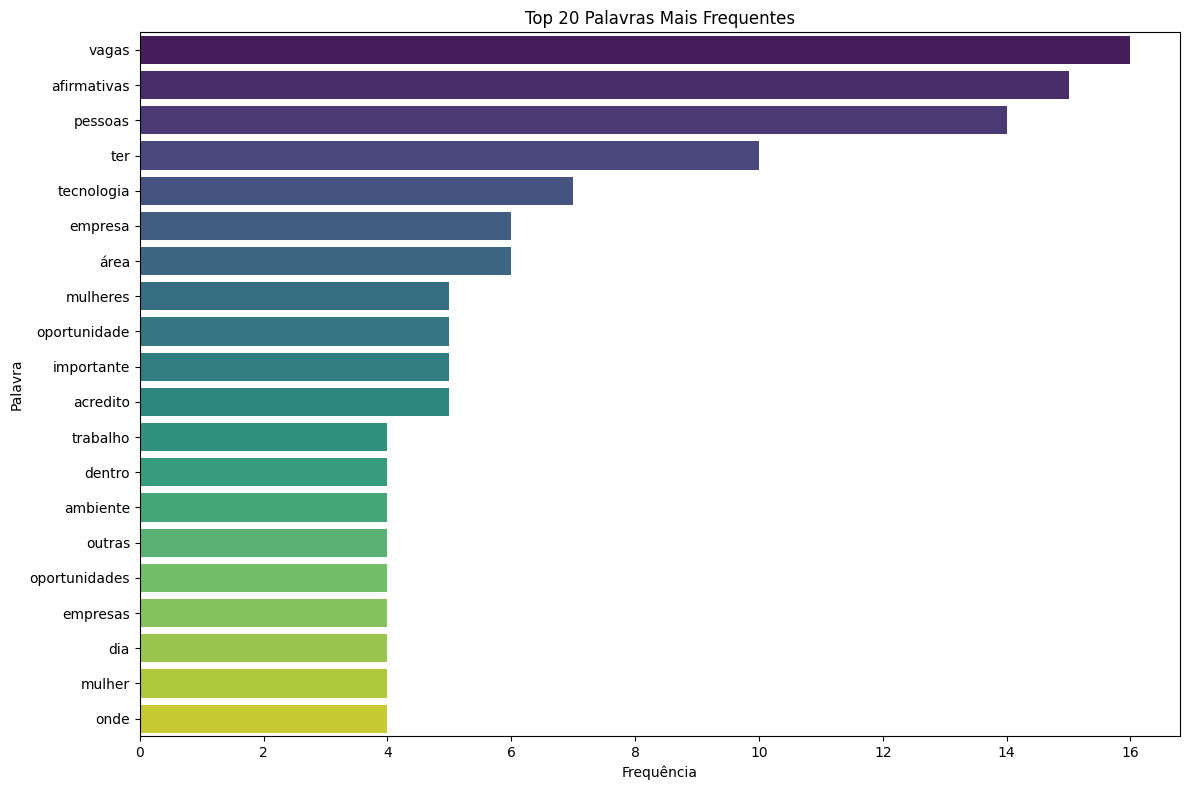

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from top_words
df_top_words = pd.DataFrame(top_words, columns=['Palavra', 'Frequência'])

# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequência', y='Palavra', data=df_top_words, palette='viridis')

# Add title and labels
plt.title('Top 20 Palavras Mais Frequentes')
plt.xlabel('Frequência')
plt.ylabel('Palavra')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Identificar outras colunas de texto relevantes com os nomes corrigidos
text_columns_to_analyze = df.columns.tolist()

# Realizar a análise de frequência de palavras para cada coluna
for col in text_columns_to_analyze:
    print(f"\nAnálise de frequência para a coluna: '{col}'")

    # Preencher valores NaN com strings vazias
    column_text = df[col].fillna('')

    # Aplicar pré-processamento
    processed_column_text = column_text.apply(preprocess_text)

    # Tokenização e remoção de stop words
    column_tokens = []
    for text in processed_column_text:
        word_tokens = nltk.word_tokenize(text, language='portuguese')
        filtered_tokens = [word for word in word_tokens if word not in stop_words and len(word) > 2]
        column_tokens.extend(filtered_tokens)

    # Contagem de palavras
    column_word_counts = Counter(column_tokens)
    top_column_words = column_word_counts.most_common(20)

    # Imprimir os resultados
    print(f"✅ As 20 palavras mais recorrentes na coluna '{col}' são:")
    for word, count in top_column_words:
        print(f"- {word}: {count} ocorrências")


Análise de frequência para a coluna: 'timestamp'
✅ As 20 palavras mais recorrentes na coluna 'timestamp' são:

Análise de frequência para a coluna: 'idade_ate_25'
✅ As 20 palavras mais recorrentes na coluna 'idade_ate_25' são:
- ensino: 9 ocorrências
- superior: 6 ocorrências
- médio: 3 ocorrências
- pósgraduação: 3 ocorrências

Análise de frequência para a coluna: 'idade_26_35'
✅ As 20 palavras mais recorrentes na coluna 'idade_26_35' são:
- ensino: 12 ocorrências
- superior: 11 ocorrências
- pósgraduação: 7 ocorrências
- mestrado: 3 ocorrências
- médio: 1 ocorrências

Análise de frequência para a coluna: 'idade_36_45'
✅ As 20 palavras mais recorrentes na coluna 'idade_36_45' são:
- pósgraduação: 3 ocorrências
- ensino: 1 ocorrências
- superior: 1 ocorrências

Análise de frequência para a coluna: 'idade_46_ou_mais'
✅ As 20 palavras mais recorrentes na coluna 'idade_46_ou_mais' são:
- pósgraduação: 3 ocorrências

Análise de frequência para a coluna: 'preta'
✅ As 20 palavras mais recor

**Visualizar as palavras mais frequentes em uma nuvem de palavras**
Subtask:
Criar uma nuvem de palavras para visualizar as palavras mais frequentes identificadas na análise de frequência.
Reasoning: Utilizar a biblioteca wordcloud para gerar uma nuvem de palavras a partir do dicionário de contagem de palavras, permitindo uma visualização rápida das palavras mais frequentes.

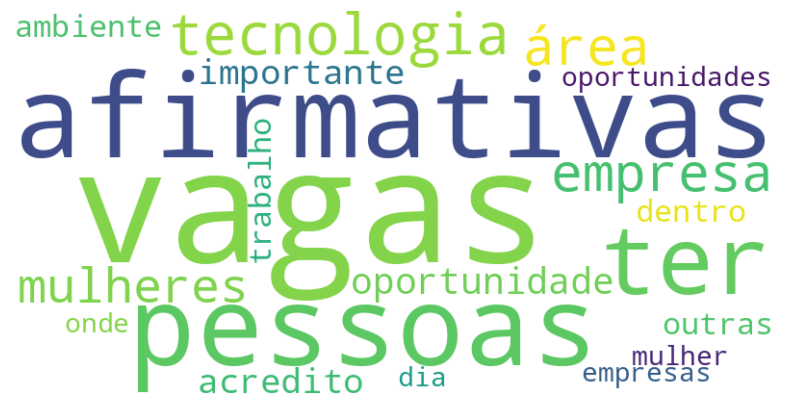

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Converter o resultado da contagem de palavras (top_words) para um dicionário
# A biblioteca wordcloud espera um dicionário onde as chaves são as palavras e os valores são as frequências.
wordcloud_dict = dict(top_words)

# Criar o objeto WordCloud
# Você pode ajustar os parâmetros como width, height, background_color, colormap, etc.
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(wordcloud_dict)

# Exibir a nuvem de palavras usando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Remove os eixos
plt.show()

In [6]:
# Carregar o DataFrame limpo
#df = pd.read_csv('dados_limpos.csv')

# Preencher valores nulos com string vazia nas colunas de texto para evitar erros
#df['comentario_aberto'] = df['comentario_aberto'].fillna('')
#df['desafios_permanencia'] = df['desafios_permanencia'].fillna('')
df['opiniao_vagas_afirmativas'] = df['opiniao_vagas_afirmativas'].fillna('')
#df['fatores_permanencia'] = df['fatores_permanencia'].fillna('')


# Criar novas variáveis binárias baseadas em temas
# Usamos 'np.where' para criar colunas com 'Sim' ou 'Não'

# Tema 1: Vagas Afirmativas e Oportunidades
df['tema_vagas_oportunidades'] = np.where(
    df['opiniao_vagas_afirmativas'].str.contains('vagas afirmativas|oportunidade|oportunidades|acesso', case=False, na=False),
    'Sim', 'Não'
)

# Tema 2: Cultura e Ambiente de Trabalho
df['tema_cultura_ambiente'] = np.where(
    df['opiniao_vagas_afirmativas'].str.contains('cultura|diversidade|ambiente|inclusivo', case=False, na=False),
    'Sim', 'Não'
)

# Tema 3: Mentoria e Suporte
df['tema_mentoria_suporte'] = np.where(
    df['opiniao_vagas_afirmativas'].str.contains('mentoria|suporte|apoio', case=False, na=False),
    'Sim', 'Não'
)

# Tema 4: Progressão de Carreira e Remuneração
df['tema_progressao_remuneracao'] = np.where(
    df['opiniao_vagas_afirmativas'].str.contains('salário|remuneração|promoção|crescimento|progressão', case=False, na=False),
    'Sim', 'Não'
)

print("✅ Novas variáveis temáticas criadas com sucesso!")
print("\nPrimeiras 5 linhas das novas colunas:")
print(df[['tema_vagas_oportunidades', 'tema_cultura_ambiente', 'tema_mentoria_suporte', 'tema_progressao_remuneracao']].head())

# Salvar o novo DataFrame com as variáveis adicionais
df.to_csv('dados_com_temas.csv', index=False)

✅ Novas variáveis temáticas criadas com sucesso!

Primeiras 5 linhas das novas colunas:
  tema_vagas_oportunidades tema_cultura_ambiente tema_mentoria_suporte  \
0                      Não                   Não                   Não   
1                      Não                   Sim                   Não   
2                      Não                   Não                   Não   
3                      Não                   Não                   Não   
4                      Sim                   Não                   Não   

  tema_progressao_remuneracao  
0                         Não  
1                         Não  
2                         Não  
3                         Não  
4                         Não  


In [7]:
# Exemplo: Se você tem uma pasta chamada "TCC" e dentro dela uma subpasta "Dados"
caminho_da_pasta = '/content/drive/MyDrive/MBA/TCC/Materiais_e_Metodos/Dados/'
nome_do_arquivo = 'dados_com_temas.csv'
caminho_completo = caminho_da_pasta + nome_do_arquivo

# Supondo que o seu DataFrame se chame 'df'
# (Crie um DataFrame de exemplo se estiver testando)
# df = pd.DataFrame({'coluna1': [1, 2], 'coluna2': ['A', 'B']})

# Passo 3: Salvar o DataFrame no caminho especificado
# O argumento 'index=False' é importante para não salvar o índice do DataFrame no CSV.
df.to_csv(caminho_completo, index=False)

print(f"Arquivo '{nome_do_arquivo}' salvo com sucesso em:")
print(caminho_da_pasta)

Arquivo 'dados_com_temas.csv' salvo com sucesso em:
/content/drive/MyDrive/MBA/TCC/Materiais_e_Metodos/Dados/
